<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/insurance.csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas
from sklearn.preprocessing import  StandardScaler as S_scaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
y = data['charges']
data = data.drop(data.columns[[1,3,4,5,6]], axis = 1)

data.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


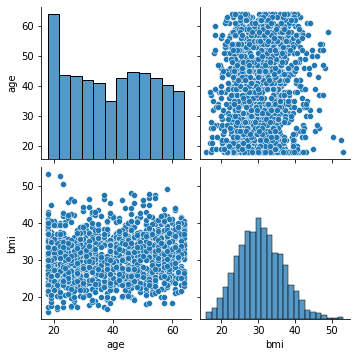

In [4]:
sas.pairplot(data)

<Axes: >

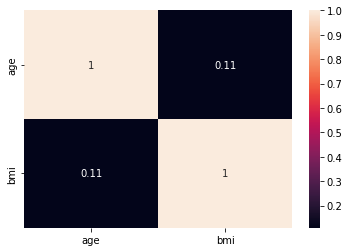

In [5]:
#Biểu đồ nhiệt thể hiện thay thế cho ma trận correlation
corr = data.corr()
sas.heatmap(corr,annot = True)

In [6]:
#Su dung data der train cho AI
x = data

In [7]:
sc = S_scaler()
x = sc.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
x_train.shape

(1070, 2)

In [9]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, random_state=0)
x_test.shape

(134, 2)

In [10]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
y_train.shape

(1070,)

In [11]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, random_state=0)
y_test.shape

(134,)

In [12]:
regression = LR()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test).round(1)

calculation = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original charges','Predicted charges'])
print('Do chinh xac cua train:',regression.score(x_train, y_train))
print('Do chinh xac cua test:',regression.score(x_test, y_test))

Do chinh xac cua train: 0.11092122845328878
Do chinh xac cua test: 0.12408525895570022
